In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def read_data(file_path):
    data = pd.read_csv(file_path, header=None)
    data.columns = ["random_seed", "crossover", "number_of_parameters", "MRPS", "number_of_evaluations"]
    data = data[data["number_of_evaluations"] > 0]
    data.drop(columns=["random_seed"], inplace=True)
    grouped_data_mean = data.groupby(["crossover", "number_of_parameters"]).mean()
    grouped_data_std = data.groupby(["crossover", "number_of_parameters"]).std()
    summary_data = pd.merge(grouped_data_mean, grouped_data_std, on=["crossover", "number_of_parameters"], suffixes=('_mean', '_std'))
    return summary_data

def Mrps_comparison(line1x_mrps, lineUx_mrps, label):
    plt.figure(figsize=(8, 6))

    plt.errorbar([point[0] for point in line1x_mrps], [point[1] for point in line1x_mrps], yerr=[point[2] for point in line1x_mrps], fmt='o-', capsize=5, label='1X')
    plt.errorbar([point[0] for point in lineUx_mrps], [point[1] for point in lineUx_mrps], yerr=[point[2] for point in lineUx_mrps], fmt='o-', capsize=5, label='UX')
    
    plt.yscale('log')
    plt.xlabel('Number of Parameters')
    plt.ylabel('MRPS (log-scale)')
    plt.title(f'Evaluations Comparison of {label}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'Comparision_plot/Comparison of MRPS - {label}')
    # plt.show()
    return plt

def Evaluations_comparison(line1x_eval, lineUx_eval, label):
    plt.figure(figsize=(8, 6))

    plt.errorbar([point[0] for point in line1x_eval], [point[1] for point in line1x_eval], yerr=[point[2] for point in line1x_eval], fmt='o-', capsize=5, label='1X')
    plt.errorbar([point[0] for point in lineUx_eval], [point[1] for point in lineUx_eval], yerr=[point[2] for point in lineUx_eval], fmt='o-', capsize=5, label='UX')
    
    plt.yscale('log')
    plt.xlabel('Number of Parameters (log-scale)')
    plt.ylabel('Number of Evaluations')
    plt.title(f'Evaluations Comparison of {label}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'Comparision_plot/Comparison of Evaluations - {label}')
    # plt.show()
    return plt

def PlotDrawing(data, label):
    line1x_mrps = []
    line1x_eval = []
    lineUx_mrps = []
    lineUx_eval = []
    for index, row in data.iterrows():
        crossover = index[0]
        number_of_parameters = index[1]
        MRPS = row['MRPS_mean']
        number_of_evaluations = row['number_of_evaluations_mean']
        std_MRPS = row['MRPS_std']
        std_number_of_evaluations = row['number_of_evaluations_std']
        if crossover == '1X':
            line1x_mrps.append([number_of_parameters, MRPS, std_MRPS])
            line1x_eval.append([number_of_parameters, number_of_evaluations, std_number_of_evaluations])
        elif crossover == 'UX':
            lineUx_mrps.append([number_of_parameters, MRPS, std_MRPS])
            lineUx_eval.append([number_of_parameters, number_of_evaluations, std_number_of_evaluations])
    
    plt1 = Mrps_comparison(line1x_mrps, lineUx_mrps, label)
    plt2 = Evaluations_comparison(line1x_eval, lineUx_eval, label)
    return plt1, plt2


In [166]:
onemax = read_data('results/onemax.txt')
leadingone = read_data('results/leadingone.txt')
cctrapk = read_data('results/concatenated_trap_k.txt')

In [167]:
onemax

MRPS_mean  number_of_evaluations_mean  \
crossover number_of_parameters                                          
1X        10                         37.2                      129.56   
          20                        105.6                      548.96   
          40                        352.0                     2699.52   
          80                       1216.0                    14307.84   
UX        10                         24.8                       83.08   
          20                         48.8                      227.26   
          40                         88.0                      594.04   
          80                        166.4                     1582.08   
          160                       273.6                     3745.52   

                                  MRPS_std  number_of_evaluations_std  
crossover number_of_parameters                                         
1X        10                      3.293090                  16.939317  
          20                     19.884109                  90.737658  
          40                     62.196820                 373.237169  
          80                    235.634368                2468.868979  
UX        10                      5.593647                  16.258249  
          20                      6.196773                  23.685166  
          40                      9.237604                  54.557436  
          80                     25.241940                 213.763633  
          160                    29.646810                 382.456983

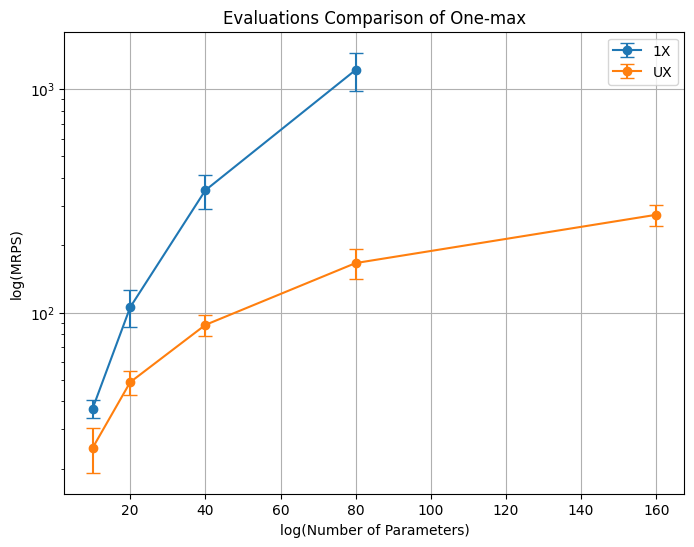

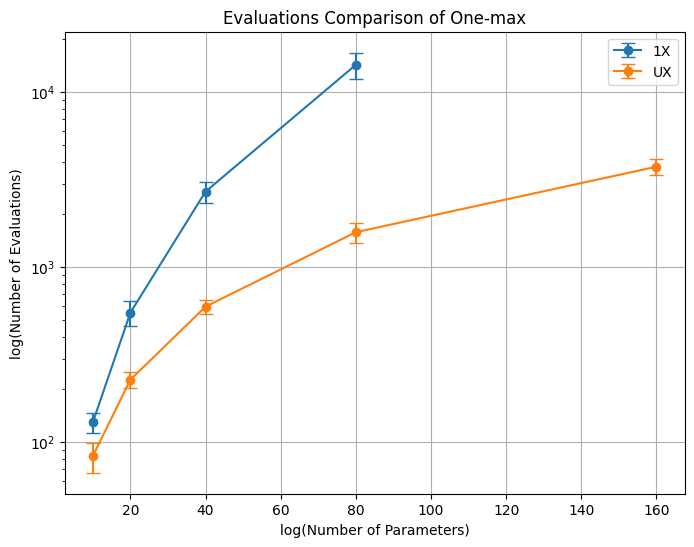

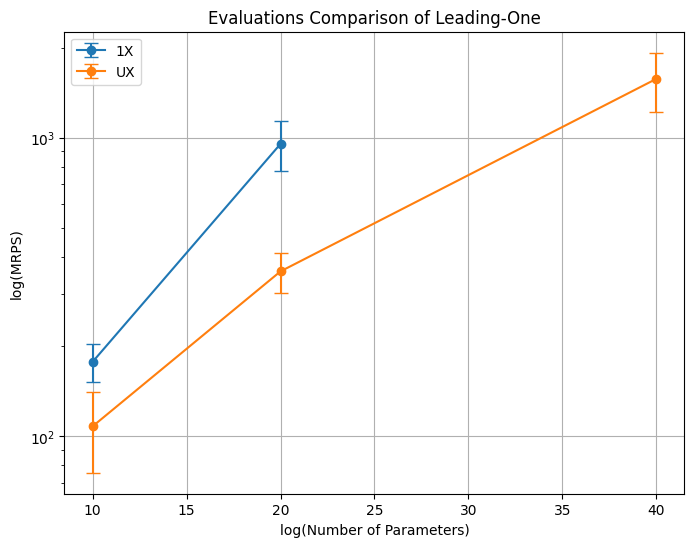

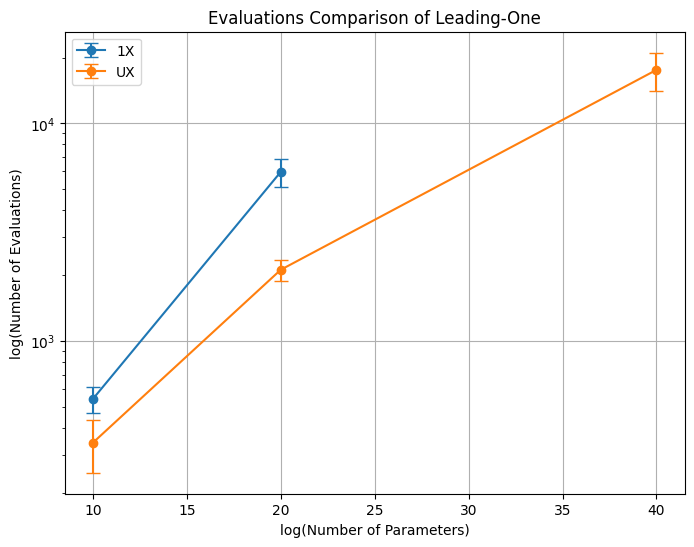

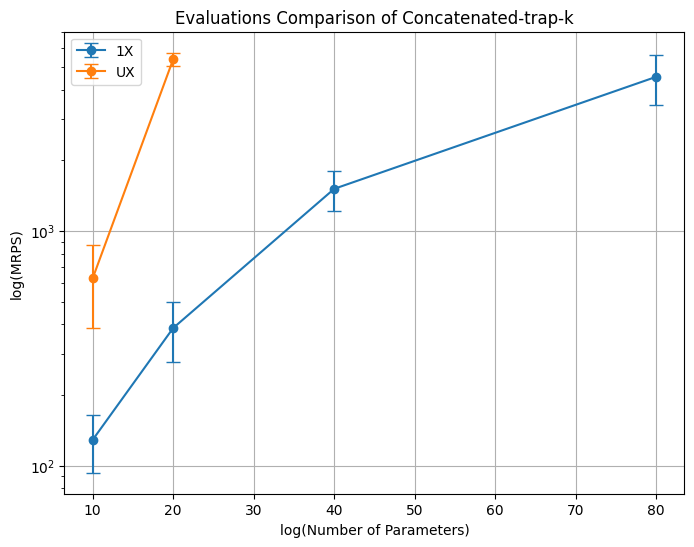

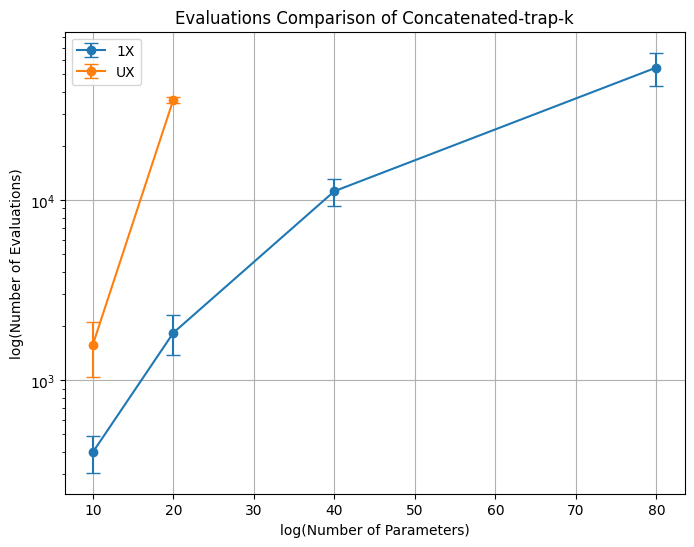

In [168]:
onemax_1, onemax_2 = PlotDrawing(onemax, 'One-max')
leadingone_1, leadingone_2 = PlotDrawing(leadingone, 'Leading-One')
cctrapk_1, cctrapk_2 = PlotDrawing(cctrapk, 'Concatenated-trap-k')

In [171]:
onemax

MRPS_mean  number_of_evaluations_mean  \
crossover number_of_parameters                                          
1X        10                         37.2                      129.56   
          20                        105.6                      548.96   
          40                        352.0                     2699.52   
          80                       1216.0                    14307.84   
UX        10                         24.8                       83.08   
          20                         48.8                      227.26   
          40                         88.0                      594.04   
          80                        166.4                     1582.08   
          160                       273.6                     3745.52   

                                  MRPS_std  number_of_evaluations_std  
crossover number_of_parameters                                         
1X        10                      3.293090                  16.939317  
          20                     19.884109                  90.737658  
          40                     62.196820                 373.237169  
          80                    235.634368                2468.868979  
UX        10                      5.593647                  16.258249  
          20                      6.196773                  23.685166  
          40                      9.237604                  54.557436  
          80                     25.241940                 213.763633  
          160                    29.646810                 382.456983

In [172]:
leadingone

MRPS_mean  number_of_evaluations_mean  \
crossover number_of_parameters                                          
1X        10                        177.6                      541.36   
          20                        953.6                     5970.88   
UX        10                        108.0                      340.92   
          20                        356.8                     2122.16   
          40                       1574.4                    17560.96   

                                  MRPS_std  number_of_evaluations_std  
crossover number_of_parameters                                         
1X        10                     25.522104                  75.334206  
          20                    182.147193                 897.632101  
UX        10                     32.496154                  92.446078  
          20                     54.415684                 235.495521  
          40                    352.096956                3493.305095

In [173]:
cctrapk

MRPS_mean  number_of_evaluations_mean  \
crossover number_of_parameters                                          
1X        10                        128.8                      398.64   
          20                        385.6                     1834.16   
          40                       1510.4                    11212.16   
          80                       4531.2                    54484.48   
UX        10                        627.2                     1573.60   
          20                       5376.0                    36121.60   

                                   MRPS_std  number_of_evaluations_std  
crossover number_of_parameters                                          
1X        10                      35.467669                  91.953263  
          20                     110.452805                 460.788279  
          40                     294.369081                1913.813916  
          80                    1093.132990               11335.639980  
UX        10                     240.509090                 534.121684  
          20                     362.038672                1484.358555